#import both data sets


#create custom perceptron 
#compare with sci-kit learn svm and logistic regression
#use sci-kit learn for accuracy and confusion matrices




In [88]:
pip install ucimlrepo



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC




Train SVM Accuracy: 0.929192546583851
Dev SVM Accuracy: 0.9289855072463769
Spambase SVM Test Accuracy: 0.9304347826086956
Spambase SVM Confusion Matrix:
 [[397  21]
 [ 27 245]]


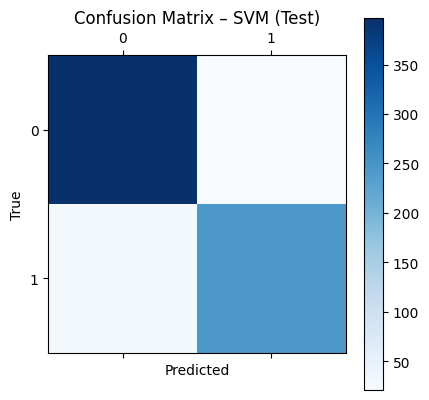

In [91]:



df = pd.read_csv("/Users/anvith/hw2_ml/spambase.data") 



X = df.iloc[:, :-1].values #take all columns except last as features because last is label, columns is one attribute and rows are entire samples
y = df.iloc[:, -1].values #labels for spam or not spam, takes values only and converts into numpy array for sci-kit learn compatibility



#initial 70-30 split of test
X_train, X_test, y_train, y_test = train_test_split( #X_train is the training feautres, y train is training labels and X_test is test features and y_test is test labels
    X, y, test_size=0.30, stratify=y, random_state=42
)
#now split the 30% test into dev and final test 50-50
X_dev, X_test, y_dev, y_test = train_test_split( #always outputs in this order
    X_test, y_test, test_size=0.50, stratify=y_test, random_state=42
)

model = LinearSVC(C=1.0, penalty="l2", loss="squared_hinge", random_state=42, max_iter=5000) # tested a bunch of different C values here, the value of C determines the regularization strength, regularization helps prevent overfitting by adding a penalty to the loss function for large weights, smaller C means stronger regularization, larger C means weaker regularization
model.fit(X_train, y_train) #training the model based on training split and training labels

y_train_pred = model.predict(X_train) #predicting on training set
train_accuracy = accuracy_score(y_train, y_train_pred) #comparing predicted labels to actual
print("Train SVM Accuracy:", train_accuracy)


y_dev_pred = model.predict(X_dev) #predicting on dev set
dev_accuracy = accuracy_score(y_dev, y_dev_pred) #comparing predicted labels to actual labels to get accuracy
print("Dev SVM Accuracy:", dev_accuracy)


y_pred = model.predict(X_test) #outputs predicted labels based on test features


spam_accuracy = accuracy_score(y_test, y_pred) #comparing predicted labels to actual labels to get accuracy
spam_confusion = confusion_matrix(y_test, y_pred) #confusion matrix to see true positives, true negatives, false positives, false negatives

print("Spambase SVM Test Accuracy:", spam_accuracy)
print("Spambase SVM Confusion Matrix:\n", spam_confusion)

#graph visualization
cm_svm = confusion_matrix(y_test, y_pred)
plt.matshow(cm_svm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix – SVM (Test)')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()











Accuracy: 0.9326086956521739
Confusion Matrix:
 [[266  13]
 [ 18 163]]


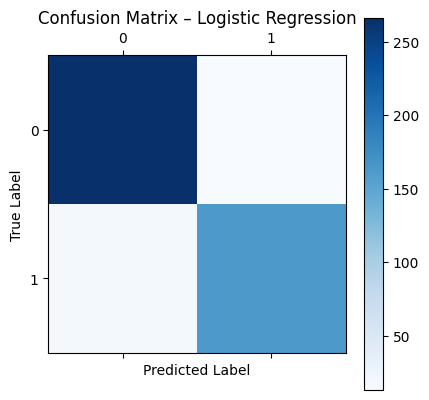

In [92]:
#TESTING LOGISTIC REGRESSION ON SPAMBASE DATASET

X = df.iloc[:, :-1].values # feature matrix
y = df.iloc[:, -1].values # target vector

X_train, X_dev_test, y_train, y_dev_test = train_test_split( # split into train and dev+test
    X, y, test_size=0.20, stratify=y, random_state=42 # ensure reproducibility and maintain class distribution
)

X_dev, X_test, y_dev, y_test = train_test_split( # split dev+test into dev and test
    X_dev_test, y_dev_test, test_size=0.50, stratify=y_dev_test, random_state=42
)

scaler = StandardScaler() # standardize features because logistic regression is sensitive to feature scaling
X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000) # initialize logistic regression model, still have to tweak and tune hyperparameters and what not
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # predict on test set

accuracy = accuracy_score(y_test, y_pred) # calculate accuracy
confusion = confusion_matrix(y_test, y_pred) # calculate confusion matrix

print("Accuracy:", accuracy) 
print("Confusion Matrix:\n", confusion)

plt.matshow(confusion, cmap=plt.cm.Blues)
plt.title('Confusion Matrix – Logistic Regression')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Dev Accuracy: 0.9196
Test Accuracy: 0.9174
Confusion Matrix:
 [[259  20]
 [ 18 163]]


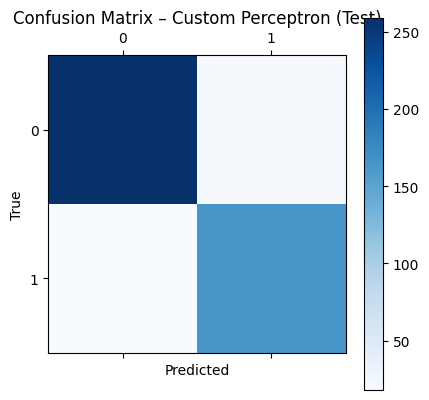

In [93]:
#MY PERCEPTRON IMPLEMENTATION ON SPAMBASE DATASET


class CustomPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        y_ = np.where(y == 0, -1, 1)
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                if y_[idx] * linear_output <= 0:
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias    += self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output >= 0, 1, -1)
        return np.where(y_predicted == -1, 0, 1)


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 2) Split into train (80%) and holdout (20%), then split holdout into dev (10%) and test (10%)
X_train, X_hold, y_train, y_hold = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_dev, X_test, y_dev, y_test = train_test_split(
    X_hold, y_hold, test_size=0.50, stratify=y_hold, random_state=42
)

# 3) Scale using train-only statistics
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev   = scaler.transform(X_dev)
X_test  = scaler.transform(X_test)

# 4) Instantiate and train perceptron
perc = CustomPerceptron(learning_rate=0.01, n_iters=1000)
perc.fit(X_train, y_train)

# 5) Dev evaluation (useful for tuning learning_rate or n_iters)
y_dev_pred = perc.predict(X_dev)
dev_acc = accuracy_score(y_dev, y_dev_pred)
print(f"Dev Accuracy: {dev_acc:.4f}")

# 6) Final test evaluation
y_test_pred = perc.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")
print("Confusion Matrix:\n", cm)

# 7) Visualize confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix – Custom Perceptron (Test)')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM Train accuracy: 1.0
SVM DEV accuracy: 1.0
SVM TEST accuracy: 1.0
[[20  0]
 [ 0 20]]
Logistic Regression TRAIN accuracy: 1.0
Logistic Regression DEV accuracy: 1.0
Logistic Regression TEST accuracy: 1.0
Logistic Regression Confusion Matrix:
 [[20  0]
 [ 0 20]]
Perceptron TRAIN accuracy: 1.0
Perceptron DEV accuracy: 0.9
Perceptron TEST accuracy: 0.9
Perceptron Confusion Matrix:
 [[18  2]
 [ 2 18]]


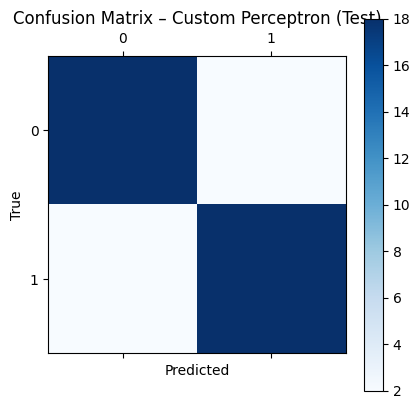

In [94]:
#PERCEPTRON/SVM/LOGISTIC REGRESSION IMPLEMENTATION ON DUTCH/ENGLISH DATASET
#import txt files and load line by line, use this for rest of code, run model training and evaluation similar to above
#first train on basic dutch.txt and english.txt files, then devlpo using dev sets and then test on test sets finally
#objective is to classify dutch vs english text files based on content
from pathlib import Path  # <-- needed for Path.read_text
from typing import List, Tuple

from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#defining paths, no need to split into train and test here as we have separate files for that
EN_PATH = "/Users/anvith/hw2_ml/universal-declaration/english.txt" # each line is a one sentence sample
DU_PATH = "/Users/anvith/hw2_ml/universal-declaration/dutch.txt" # each line is a one sentence sample
test_EN_PATH = "/Users/anvith/hw2_ml/universal-declaration/test_en.txt"
test_DU_PATH = "/Users/anvith/hw2_ml/universal-declaration/test_du.txt"
dev_du_PATH = "/Users/anvith/hw2_ml/universal-declaration/developmentdutch.txt" # each line is a one sentence sample
dev_en_PATH = "/Users/anvith/hw2_ml/universal-declaration/developmenteng.txt"



#EN = 0, NL = 1

#create X_en_y as all labels being 0 for english and X_du_y as all labels being 1 for dutch
#defining paths, no need to split into train and test here as we have separate files for that

#concatenate dutch and english data into one dataset for training after adding appropriate labels to each of them for all the splits

#load_line helper

label_map = {"EN": 0, "DU": 1}


def load_labeled_lines(path: str, label: int) -> Tuple[List[str], List[int]]:
    lines = Path(path).read_text(encoding="utf-8", errors="ignore").splitlines()
    X = [ln.strip() for ln in lines if ln.strip()]
    y = [label] * len(X)
    return X, y #returning features and labels for future use

#training set
X_en_train, y_en_train = load_labeled_lines(EN_PATH, label_map["EN"])
X_du_train, y_du_train = load_labeled_lines(DU_PATH, label_map["DU"])
X_train = X_en_train + X_du_train #combining english and dutch features for training set to feed into model for training and evaluation
y_train = y_en_train + y_du_train #combining english and dutch labels for training set to feed into model for training and evaluation

#development set(20 lines each)
X_en_dev, y_en_dev = load_labeled_lines(dev_en_PATH, label_map["EN"])
X_du_dev, y_du_dev = load_labeled_lines(dev_du_PATH, label_map["DU"])
X_dev = X_en_dev + X_du_dev
y_dev = y_en_dev + y_du_dev

#test set(20 lines each)
X_en_test, y_en_test = load_labeled_lines(test_EN_PATH, label_map["EN"])
X_du_test, y_du_test = load_labeled_lines(test_DU_PATH, label_map["DU"])
X_test = X_en_test + X_du_test
y_test = y_en_test + y_du_test

#using tf-idf vectorizer over count vectorizer to convert text data into numerical format because tf-idf gives more importance to rare words which might be more indicative of the language
vectorizer = TfidfVectorizer() #initialize tf-idf vectorizer
X_train_vec = vectorizer.fit_transform(X_train) #fit and transform training data
X_dev_vec = vectorizer.transform(X_dev) #transform dev data
X_test_vec = vectorizer.transform(X_test) #transform test data


svm = LinearSVC(C=1.0, penalty="l2", loss="squared_hinge", random_state=42, max_iter=5000) # tested a bunch of different C values here, the value of C determines the regularization strength, regularization helps prevent overfitting by adding a penalty to the loss function for large weights, smaller C means stronger regularization, larger C means weaker regularization
svm.fit(X_train_vec, y_train) #training the model based on training split and training labels

y_train_pred = svm.predict(X_train_vec) #predicting on training set
train_accuracy = accuracy_score(y_train, y_train_pred) #calculating training accuracy
print("SVM Train accuracy:", train_accuracy)


#now testing linear svc on dev set
y_dev_pred = svm.predict(X_dev_vec)
print("SVM DEV accuracy:", accuracy_score(y_dev, y_dev_pred))



#now testing linerar svc on test set
y_test_pred = svm.predict(X_test_vec)
print("SVM TEST accuracy:", accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_vec, y_train)
logistic_y_train_pred = logistic_model.predict(X_train_vec) 
print("Logistic Regression TRAIN accuracy:", accuracy_score(y_train, logistic_y_train_pred))

logistic_y_dev_pred = logistic_model.predict(X_dev_vec)
print("Logistic Regression DEV accuracy:", accuracy_score(y_dev, logistic_y_dev_pred))
logistic_y_test_pred = logistic_model.predict(X_test_vec)

print("Logistic Regression TEST accuracy:", accuracy_score(y_test, logistic_y_test_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logistic_y_test_pred))






#now testing perceptron on dutch/english dataset
#convert everything or make sure its good for perceptron compatibility

train_dense = X_train_vec.astype(np.float32).toarray()
dev_dense   = X_dev_vec.astype(np.float32).toarray()
test_dense  = X_test_vec.astype(np.float32).toarray()


train_labels = np.asarray(y_train, dtype=int).ravel()
dev_labels   = np.asarray(y_dev,   dtype=int).ravel()
test_labels  = np.asarray(y_test,  dtype=int).ravel()


perc_clf = CustomPerceptron(learning_rate=0.01, n_iters=10000)
perc_clf.fit(train_dense, train_labels)


pred_train = perc_clf.predict(train_dense)
pred_dev   = perc_clf.predict(dev_dense)
pred_test  = perc_clf.predict(test_dense)

# Metrics
print("Perceptron TRAIN accuracy:", accuracy_score(train_labels, pred_train))
print("Perceptron DEV accuracy:",   accuracy_score(dev_labels,   pred_dev))
print("Perceptron TEST accuracy:",  accuracy_score(test_labels,  pred_test))
print("Perceptron Confusion Matrix:\n", confusion_matrix(test_labels, pred_test))

#graph visualization
cm_perc = confusion_matrix(test_labels, pred_test)
plt.matshow(cm_perc, cmap=plt.cm.Blues)
plt.title('Confusion Matrix – Custom Perceptron (Test)')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()











